<a href="https://colab.research.google.com/github/guhanramachandran/Data-Science/blob/main/Dog_vs_Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2022-10-29 02:43:55--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.36.48.252, 2600:1413:b000:793::317f, 2600:1413:b000:78a::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.36.48.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   281MB/s    in 2.8s    

2022-10-29 02:43:58 (281 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [3]:
!unzip kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
from tensorflow.keras.preprocessing.image import load_img

In [7]:
import os
import random

In [8]:
input_path =[]
label=[]

for class_name in os.listdir("PetImages"):
  for path in os.listdir("PetImages/"+class_name):
    if class_name == 'Cat':
      label.append(0)
    else:
      label.append(1)
    input_path.append(os.path.join("PetImages", class_name, path ))
print(input_path[0], label[0])

PetImages/Dog/6331.jpg 1


In [9]:
print(input_path[20], label[20])

PetImages/Dog/3548.jpg 1


In [10]:
len(input_path)

25002

In [11]:
df= pd.DataFrame()
df['images'] = input_path
df['label']= label

In [12]:
df.head()

images  label
0   PetImages/Dog/6331.jpg      1
1   PetImages/Dog/7052.jpg      1
2   PetImages/Dog/4797.jpg      1
3   PetImages/Dog/9055.jpg      1
4  PetImages/Dog/11497.jpg      1

In [13]:
df= df.sample(frac=1).reset_index(drop=True)

In [14]:
df.head()

images  label
0  PetImages/Cat/10472.jpg      0
1   PetImages/Dog/2249.jpg      1
2   PetImages/Cat/1461.jpg      0
3   PetImages/Cat/5672.jpg      0
4  PetImages/Dog/12151.jpg      1

In [15]:
import PIL
l = []
for image in df['images']:
  try:
    img = PIL.Image.open(image)
  except:
    l.append(image)
l

['PetImages/Dog/Thumbs.db',
 'PetImages/Cat/Thumbs.db',
 'PetImages/Dog/11702.jpg',
 'PetImages/Cat/666.jpg']

In [16]:
df = df[df['images']!='PetImages/Dog/Thumbs.db']
df = df[df['images']!='PetImages/Cat/Thumbs.db']
df = df[df['images']!='PetImages/Dog/11702.jpg']
df = df[df['images']!='PetImages/Cat/666.jpg']
len(df)

24998

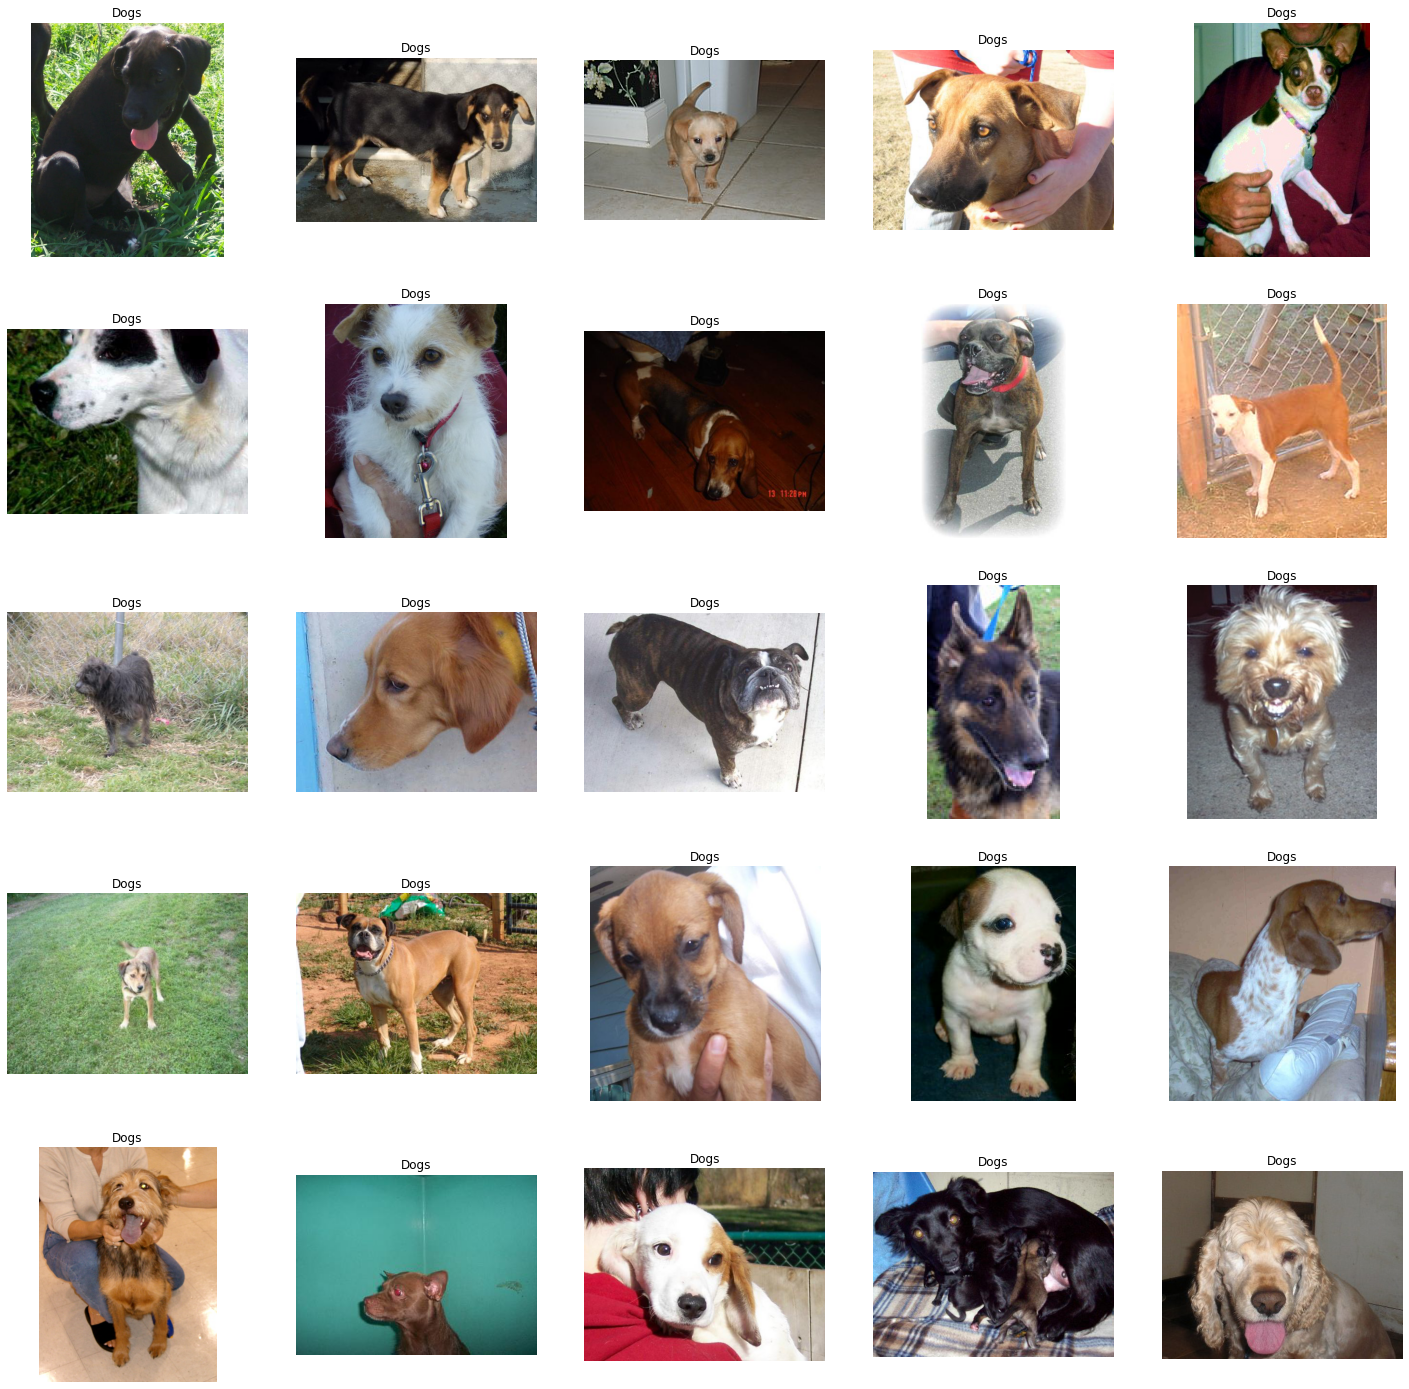

In [17]:
plt.figure(figsize=(25,25))
temp = df[df['label']==1] ['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
  plt.subplot( 5, 5, index +1)
  img= load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title('Dogs')
  plt.axis('off')



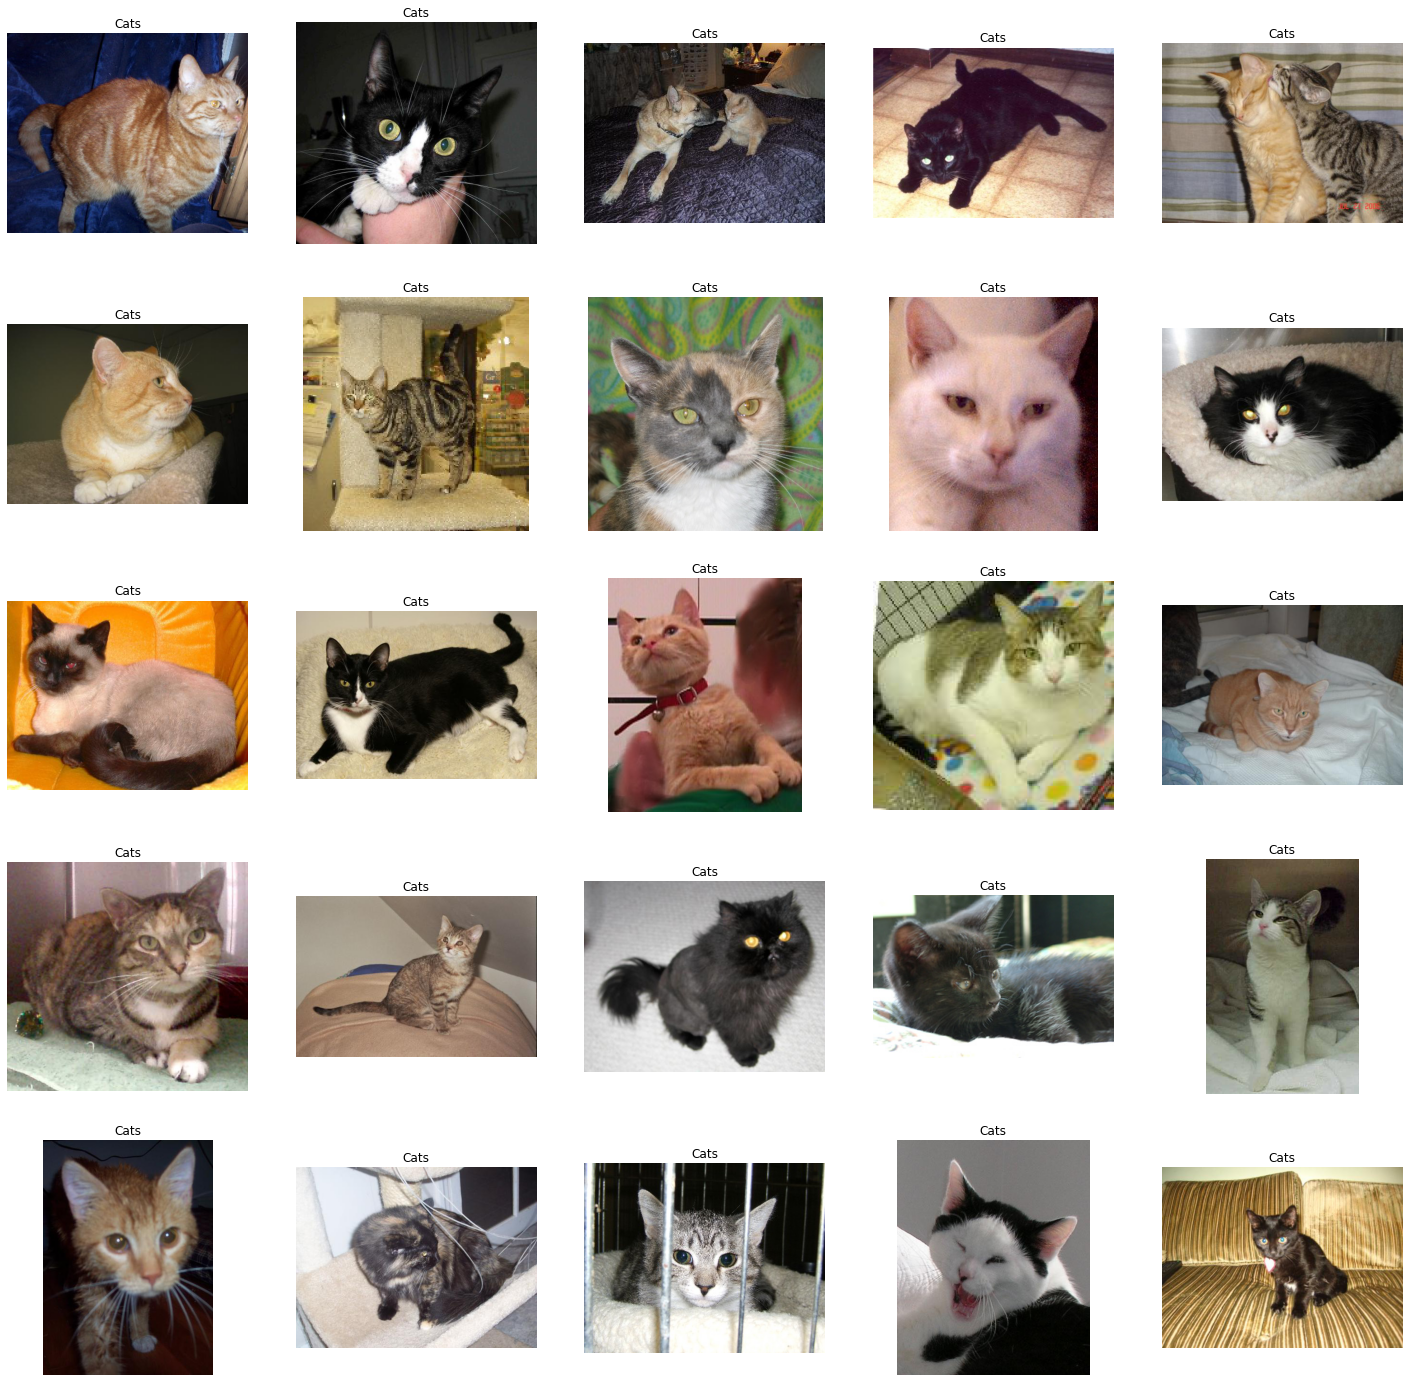

In [18]:
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
  plt.subplot( 5, 5, index +1)
  img= load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title('Cats')
  plt.axis('off')


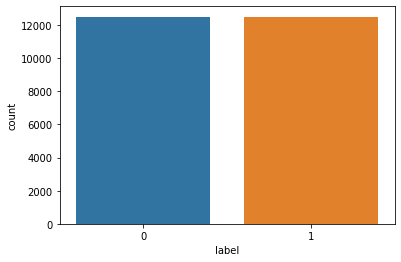

In [19]:
import seaborn as sns
sns.countplot(df['label'])

In [20]:
df.head()

images  label
0  PetImages/Cat/10472.jpg      0
1   PetImages/Dog/2249.jpg      1
2   PetImages/Cat/1461.jpg      0
3   PetImages/Cat/5672.jpg      0
4  PetImages/Dog/12151.jpg      1

In [21]:
df['label']= df['label'].astype('str')

In [22]:
df.head()

images label
0  PetImages/Cat/10472.jpg     0
1   PetImages/Dog/2249.jpg     1
2   PetImages/Cat/1461.jpg     0
3   PetImages/Cat/5672.jpg     0
4  PetImages/Dog/12151.jpg     1

In [23]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df, test_size=0.2, random_state = 25)

In [24]:
from keras.preprocessing.image import ImageDataGenerator

In [25]:
train_generator  = ImageDataGenerator (
    rescale = 1./255,
    rotation_range = 40, # augumentation of image to avoid overfitting
    shear_range= 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)



In [26]:
val_generator = ImageDataGenerator(rescale= 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train, 
    x_col = 'images',
    y_col = 'label',
    target_size  = (128,128),
    batch_size= 512,
    class_mode= 'binary'
)

val_iterator = val_generator.flow_from_dataframe(
    train, 
    x_col = 'images',
    y_col = 'label',
    target_size  = (128,128),
    batch_size= 512,
    class_mode= 'binary'
)



Found 19998 validated image filenames belonging to 2 classes.
Found 19998 validated image filenames belonging to 2 classes.


In [27]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [28]:
model = Sequential([
    Conv2D(16,(3,3), activation = 'relu', input_shape = (128,128,3)),
    MaxPool2D((2,2)),  
    Conv2D(32,(3,3), activation = 'relu'),
    MaxPool2D((2,2)),
    Conv2D(64,(3,3), activation = 'relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])


In [29]:
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [ ]:
history = model.fit(train_iterator, epochs = 13, validation_data =val_iterator )

Epoch 1/13
40/40 [==============================] - 182s 4s/step - loss: 0.7031 - accuracy: 0.5548 - val_loss: 0.6566 - val_accuracy: 0.6380
Epoch 2/13
40/40 [==============================] - 169s 4s/step - loss: 0.6376 - accuracy: 0.6362 - val_loss: 0.6614 - val_accuracy: 0.6215
Epoch 3/13
40/40 [==============================] - 168s 4s/step - loss: 0.5909 - accuracy: 0.6813 - val_loss: 0.5415 - val_accuracy: 0.7255
Epoch 4/13
40/40 [==============================] - 167s 4s/step - loss: 0.5510 - accuracy: 0.7190 - val_loss: 0.5034 - val_accuracy: 0.7580
Epoch 5/13
19/40 [=============>................] - ETA: 1:00 - loss: 0.5213 - accuracy: 0.7435

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = len(acc)

plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
plt.plot(epochs, val_acc,'r', label = 'validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
Val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label = 'Training Loss')
plt.plot(epochs, val_loss,'r', label = 'validation Loss')
plt.title('Loss graph')
plt.legend()
plt.figure()
